<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Lasso_Ridge_Quantile_and_ElasticNet_Regression/blob/master/Precy_Mae_IP_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [207]:
df=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [208]:
df.shape

(21613, 20)

In [209]:
for i in df.columns:
 print(" {}    unique values are -----> {}".format(i,len(df[i].unique())))

 id    unique values are -----> 21436
 price    unique values are -----> 3625
 bedrooms    unique values are -----> 13
 bathrooms    unique values are -----> 30
 sqft_living    unique values are -----> 1038
 sqft_lot    unique values are -----> 9782
 floors    unique values are -----> 6
 waterfront    unique values are -----> 2
 view    unique values are -----> 5
 condition    unique values are -----> 5
 grade    unique values are -----> 12
 sqft_above    unique values are -----> 946
 sqft_basement    unique values are -----> 306
 yr_built    unique values are -----> 116
 yr_renovated    unique values are -----> 70
 zipcode    unique values are -----> 70
 lat    unique values are -----> 5034
 long    unique values are -----> 752
 sqft_living15    unique values are -----> 777
 sqft_lot15    unique values are -----> 8689


## Feature Engineering

In [210]:
# To get the age column, I will first get current year minus year build
import datetime 
df['hse_age']=datetime.datetime.now().year-df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33


In [211]:
# Creating a column containing yrs since renovation
import datetime 
df['yrs_since_renovation']=datetime.datetime.now().year-df['yr_renovated']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65,2020
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69,29
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87,2020
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55,2020
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33,2020


In [212]:
# Fixing the years since renovation containing 2020 to the actual age
df.loc[df['yrs_since_renovation']== 2020, 'yrs_since_renovation'] =datetime.datetime.now().year -df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65,65
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69,29
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87,87
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55,55
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33,33


In [213]:
df.drop(['yr_built','yr_renovated','id','long','lat'], axis = 1, inplace= True) 
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,65,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,69,29
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,87,87


In [214]:
# Creating categorical features
cat_features=["bedrooms","bathrooms","floors","waterfront","view","condition","grade","zipcode"]
# 
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]= lbl_encoders[feature].fit_transform(df[feature])

In [215]:
df.dtypes

price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
hse_age                   int64
yrs_since_renovation      int64
dtype: object

In [216]:
# Changing the data types to category
#for feature in cat_features:
#  df[feature]= df[feature].astype('category')

In [217]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,221900.0,3,3,1180,5650,0,0,0,2,5,1180,0,66,1340,5650,65,65
1,538000.0,3,8,2570,7242,2,0,0,2,5,2170,400,55,1690,7639,69,29
2,180000.0,2,3,770,10000,0,0,0,2,4,770,0,16,2720,8062,87,87
3,604000.0,4,11,1960,5000,0,0,0,4,5,1050,910,58,1360,5000,55,55
4,510000.0,3,7,1680,8080,0,0,0,2,6,1680,0,37,1800,7503,33,33


In [218]:
for i in df.columns:
 print(" {}    unique values are -----> {}".format(i,len(df[i].unique())))

 price    unique values are -----> 3625
 bedrooms    unique values are -----> 13
 bathrooms    unique values are -----> 30
 sqft_living    unique values are -----> 1038
 sqft_lot    unique values are -----> 9782
 floors    unique values are -----> 6
 waterfront    unique values are -----> 2
 view    unique values are -----> 5
 condition    unique values are -----> 5
 grade    unique values are -----> 12
 sqft_above    unique values are -----> 946
 sqft_basement    unique values are -----> 306
 zipcode    unique values are -----> 70
 sqft_living15    unique values are -----> 777
 sqft_lot15    unique values are -----> 8689
 hse_age    unique values are -----> 116
 yrs_since_renovation    unique values are -----> 116


### Standardization

In [219]:
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['sqft_living', 'sqft_lot','sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'hse_age',
       'yrs_since_renovation']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])

## Feature Selection

In [220]:
# To understand which are the most important features
X= df.loc[:, df.columns != 'price']

Y= df.iloc[:, df.columns == 'price']
from sklearn.ensemble import ExtraTreesRegressor
# Initialize
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [221]:
print(model.feature_importances_)

[0.01434301 0.04209138 0.1932379  0.01870632 0.01228093 0.03774638
 0.04798565 0.01428835 0.27085115 0.06653022 0.02168288 0.06121147
 0.08607836 0.02009832 0.05920339 0.0336643 ]


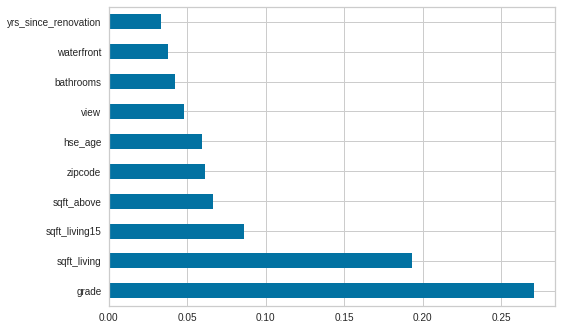

In [222]:
# To plot graph of the top ten features that influence house price
feat_importances= pd.Series(model.feature_importances_, index= X.columns)
# You can take the top five important features
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The most important factor affecting house price is the house grade followed by sqft living and sqft living of the 15 nearest houses

In [223]:
# We will therefore use only the ten features selected above
cols=['yrs_since_renovation','view','waterfront','bathrooms','hse_age','zipcode','sqft_above','sqft_living15','sqft_living','grade','price']
dfh=df[cols]

In [224]:
# Let as take a look at the statistical measures of our dataframe h
dfh.describe()

,yrs_since_renovation,view,waterfront,bathrooms,hse_age,zipcode,sqft_above,sqft_living15,sqft_living,grade,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04
mean,7.287209e-16,0.234303,0.007542,7.459122,-7.204096e-16,35.146995,3.892022e-16,-1.506632e-16,3.174253e-16,5.656919,5.401822e+05
std,1.000023e+00,0.766318,0.086517,3.076836,1.000023e+00,19.246708,1.000023e+00,1.000023e+00,1.000023e+00,1.175216,3.673622e+05
min,-1.444620e+00,0.000000,0.000000,0.000000,-1.497813e+00,0.000000,-1.809494e+00,-2.316325e+00,-1.948891e+00,0.000000,7.500000e+04
25%,-8.891833e-01,0.000000,0.000000,6.000000,-8.849999e-01,21.000000,-7.226314e-01,-7.244971e-01,-7.108948e-01,5.000000,3.219500e+05
50%,-1.254585e-01,0.000000,0.000000,8.000000,-1.360059e-01,34.000000,-2.758102e-01,-2.138280e-01,-1.849914e-01,5.000000,4.500000e+05
75%,6.729810e-01,0.000000,0.000000,9.000000,6.810785e-01,52.000000,5.091458e-01,5.448802e-01,5.118578e-01,6.000000,6.450000e+05
max,2.547578e+00,4.000000,1.000000,29.000000,2.417383e+00,69.000000,9.204044e+00,6.162239e+00,1.247807e+01,11.000000,7.700000e+06


### Multicollinearity

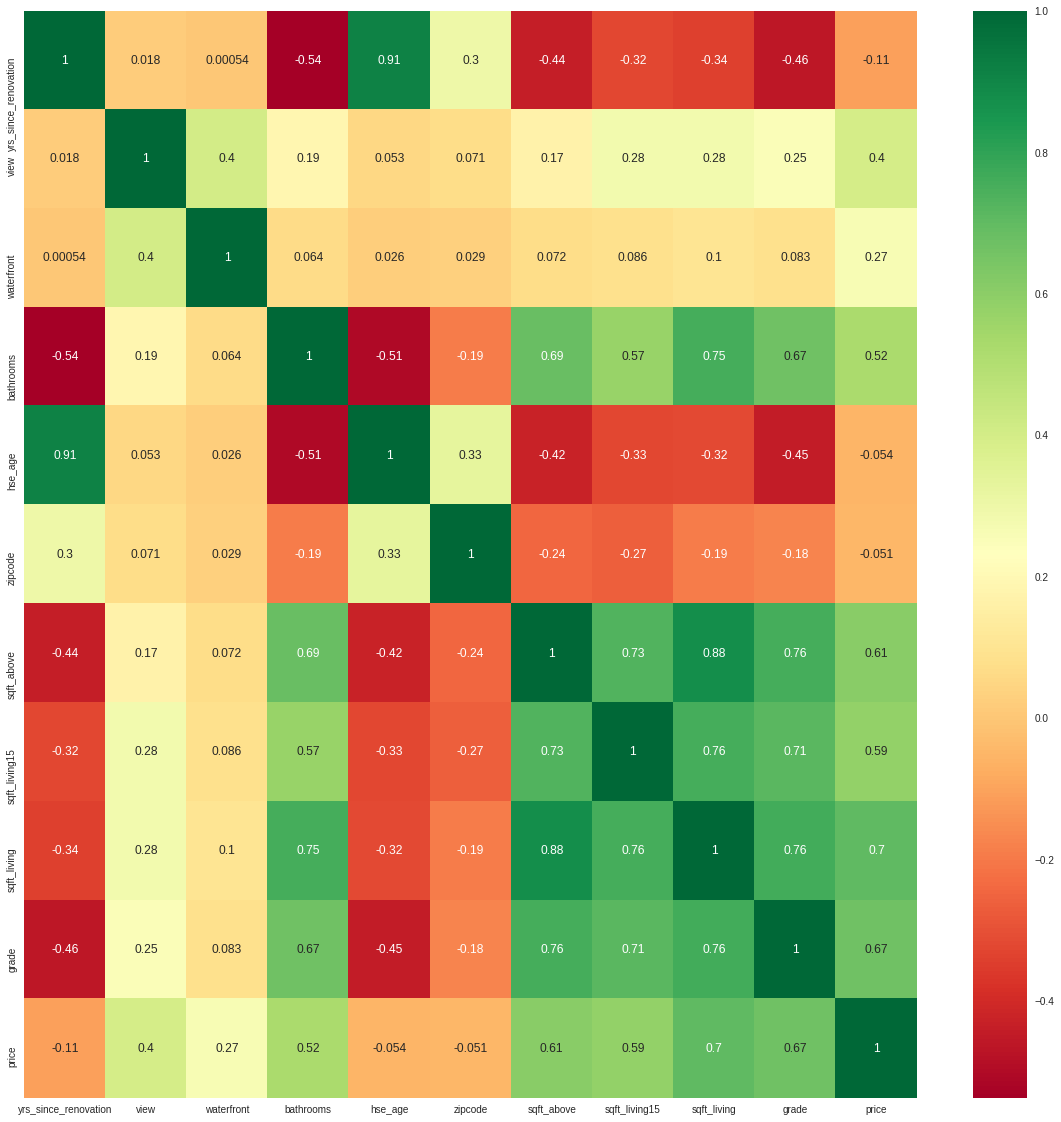

In [225]:
corrmat= dfh.corr()
top_corr_features= corrmat.index
#
plt.figure(figsize=(20,20))
# Plot heatmap
g=sns.heatmap(dfh[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [226]:
# Check the VIF score of each variable diagonally
pd.DataFrame(np.linalg.inv(corrmat.values), index = corrmat.index, columns=corrmat.columns)


,yrs_since_renovation,view,waterfront,bathrooms,hse_age,zipcode,sqft_above,sqft_living15,sqft_living,grade,price
yrs_since_renovation,6.154764,0.059289,0.077366,0.685661,-5.214203,-0.049194,0.234814,-0.255879,-0.311694,0.245083,0.025741
view,0.059289,1.428331,-0.460951,0.004559,-0.131081,-0.116980,0.482226,-0.276036,-0.365306,-0.082571,-0.272780
waterfront,0.077366,-0.460951,1.253474,0.052314,0.045380,0.009400,-0.103022,0.074495,0.166088,0.197928,-0.396963
bathrooms,0.685661,0.004559,0.052314,3.010309,0.365868,-0.053249,0.305669,0.219134,-2.038707,-0.201689,-0.252617
hse_age,-5.214203,-0.131081,0.045380,0.365868,6.364770,-0.294104,0.430070,0.258595,-0.542070,0.633682,-0.828819
zipcode,-0.049194,-0.116980,0.009400,-0.053249,-0.294104,1.191765,0.112116,0.334990,0.003134,-0.188022,-0.029224
sqft_above,0.234814,0.482226,-0.103022,0.305669,0.430070,0.112116,5.315812,-0.545623,-3.813413,-0.698877,-0.026710
sqft_living15,-0.255879,-0.276036,0.074495,0.219134,0.258595,0.334990,-0.545623,2.835035,-1.037755,-0.774620,-0.104642
sqft_living,-0.311694,-0.365306,0.166088,-2.038707,-0.542070,0.003134,-3.813413,-1.037755,7.390820,-0.340023,-0.936769
grade,0.245083,-0.082571,0.197928,-0.201689,0.633682,-0.188022,-0.698877,-0.774620,-0.340023,3.619437,-1.164376


There is high correlation in very essential features like house age, yrs since renovation and squarefoot living. 
To treat multicollinearity we could have droped these columns but having them is essential to making our prediction.

##  Multiple Linear Regression

In [227]:
# Get your dependent and independent variable
X= dfh.loc[:, dfh.columns!='price']

y= dfh.iloc[:, dfh.columns == 'price']

In [228]:
# Splitting our model to train and test model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [229]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
from sklearn.metrics import mean_squared_error
print("linear R score:", linear.score(X_test, y_test)) 
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("linear coef:", linear.coef_)

linear R score: 0.6588417098077766
linear MSE: 48433175547.436104
linear coef: [[-2.21792123e+03  4.53727462e+04  5.69148426e+05  9.50065123e+03
   1.06798544e+05  1.71259932e+02  5.83963500e+03  1.49693964e+04
   1.19637410e+05  1.30111613e+05]]


* Our Linear model has 65% accuracy which is a bit low.

* Our Linear model has an MSE of 48433175547.436104 which is greater than 10% of price mean, meaning that it did not perform that well in that regard.

In [231]:
# Allowing our model to predict our X test to be able to visualize how well it performed
linear= linear.predict(X_test)

Text(0.5, 1.0, '           prediction difference between actual vs predicted price')

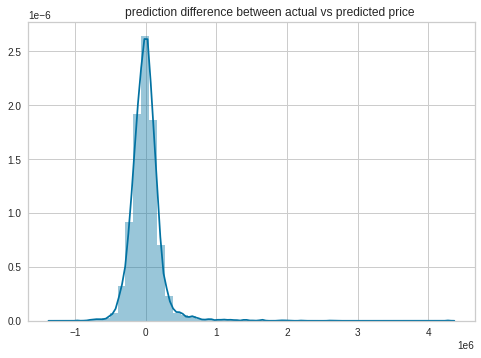

In [232]:
# Plotting  predictions for linear regression
import seaborn as sns
sns.distplot(y_test-linear)
plt.title("           prediction difference between actual vs predicted price")

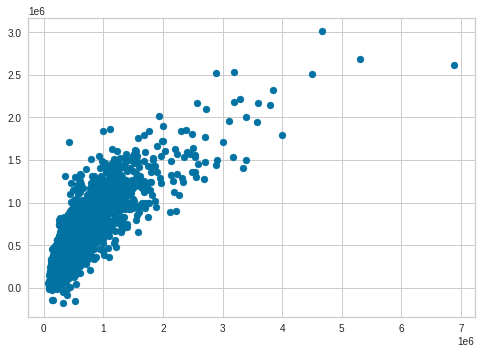

In [233]:
plt.scatter(y_test, linear)

## Quantile Regression



---

Lets first test for Heteroskedasticity

In [234]:
# We now create the residual by substracting the test value from the predicted X_test in the linear regression model

residuals = np.subtract(linear, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals.mean())

price   -251.809292
dtype: float64


price   -251.809292
dtype: float64


ValueError: ignored

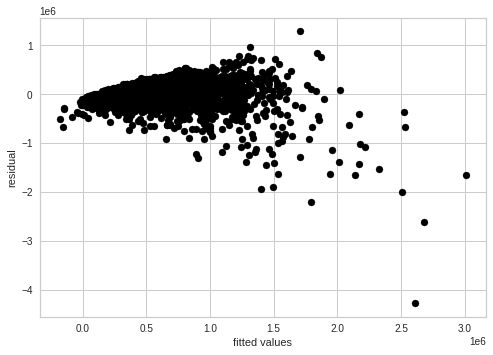

In [235]:
# We now create the residual by substracting the test value from the predicted X_test in the linear regression model

residuals = np.subtract(linear, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals.mean())
# Lets now visualize our residuals
import matplotlib.pyplot as plt
plt.scatter(linear, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Get your dependent and independent variable
import numpy as np

noise = np.random.normal(0,1,10)
x= dfh.loc[:, dfh.columns != 'price']+ noise
noise1= np.random.normal(0,1,1)
y= dfh.iloc[:, dfh.columns == 'price']+noise1

In [ ]:
# To show quantile regression results in form of percentiles
import statsmodels.formula.api as smf
# 
mod=smf.quantreg('y~X',df)
q1=mod.fit(q=0.1)
q5=mod.fit(q=0.5)
q9=mod.fit(q=0.9)

# print summary of the model
print("10th Percentile")
print(q1.summary())
print("")
print("50th Percentile")
print(q5.summary())
print("")
print("90th Percentile")
print(q9.summary())

The percentile with the highest r squared is the 90th percentile (51.47) which is lower in terms of perfomance compared to the Linear Regression which was 65.8

## Ridge Regression

In [245]:
# Using lasso regression on our model and choosing the regularization parameter with the help of GridSearch. 
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
gridridge = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='r2',cv=10)

In [246]:
#
# ridge = Ridge(normalize=True,alpha=0.01)
gridridge.fit(X_train,y_train)

# model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print("Ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("Ridge score:", gridridge.score(X_test, y_test))

Ridge MSE: 48437689167.75739
Ridge score: 0.6588099163320447


In [239]:
# Showing the coefficients of our variables by ridge regression,
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,dfh.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'yrs_since_renovation': array([1.57562568e+03, 4.74946675e+04, 5.93384665e+05, 1.12150929e+04,
        1.02438199e+05, 2.27343986e+02, 8.01022561e+03, 1.54849114e+04,
        1.17203450e+05, 1.26087374e+05])}

In [247]:
# Allowing our model to predict our X test to be able to visualize how well it performed
gridridge= gridridge.predict(X_test)

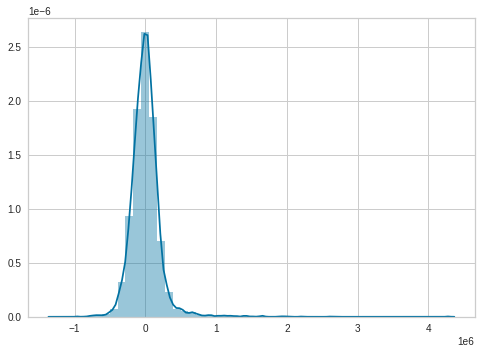

In [248]:
# Plotting  predictions for ridge
import seaborn as sns
sns.distplot(y_test-gridridge)

## Lasso Regression

In [252]:
# Building our model
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, param_grid={'alpha':np.logspace(-5,2,8)}, scoring ='r2') 


In [257]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train)
#
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso R score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))

lasso best parameters: {'alpha': 100.0}
lasso R score: 0.6586558083513007
lasso MSE: 48459567395.83863


In [260]:
# Allowing our model to predict our X test to be able to visualize how well it performed
gridlasso= gridlasso.predict(X_test)

AttributeError: ignored

In [259]:
# Plotting  predictions for lasso
import seaborn as sns
sns.distplot(y_test-gridlasso)

ValueError: ignored

## Elastic Net Regression